# **Actividad 8: Uso de software para búsqueda.**

---



### **Jose Antonio Martinez Calan 2127803**

Cargar librerías

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Verificar la versión de TensorFlow

In [15]:
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.17.0


Cargar datos

In [16]:
mnist = keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

Preprocesamiento de datos: Normalizar las imágenes

In [17]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Visualización de los datos

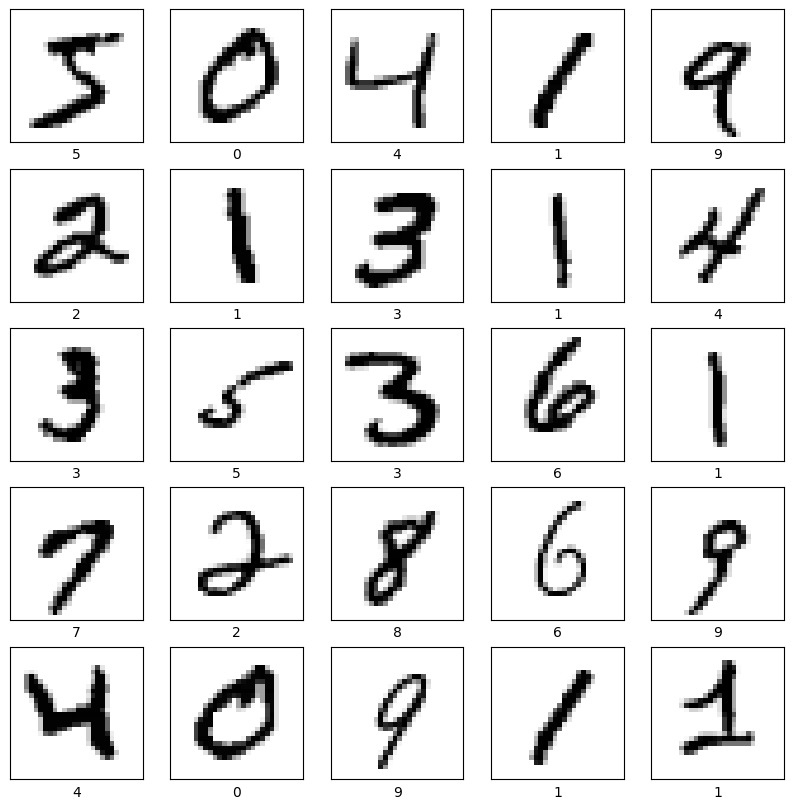

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

efinir el modelo de Red Neuronal Prealimentada (Feedforward)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     # Aplanar la imagen 28x28 a un vector de 784 elementos
    keras.layers.Dense(128, activation='relu'),     # Capa oculta con 128 neuronas y activación ReLU
    keras.layers.Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (0-9) y activación Softmax
])

Compilar el modelo

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Entrenar el modelo con los datos de entrenamiento

In [21]:
model.fit(train_data, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8793 - loss: 0.4275
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9656 - loss: 0.1177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.0771
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9838 - loss: 0.0550
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9864 - loss: 0.0432
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9900 - loss: 0.0340
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9916 - loss: 0.0269
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9934 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9948 - loss: 0.0177
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9954 - loss: 0.0141


Evaluar el modelo con los datos de prueba

In [22]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('\nExactitud en el conjunto de prueba:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9770 - loss: 0.0788

Exactitud en el conjunto de prueba: 0.9769999980926514


Realizar 5 predicciones con el conjunto de datos de prueba

In [23]:
predictions = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Función para mostrar la imagen, predicción y valor real

In [25]:
def mostrar_prediccion(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Predicción: {predicted_label} ({100*np.max(predictions_array):2.0f}%) - Valor real: {true_label}", color=color)

Mostrar predicciones para 5 imágenes de prueba

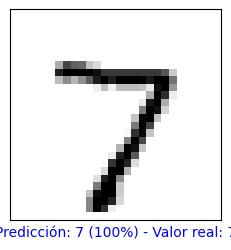

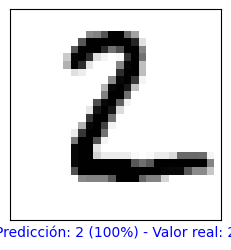

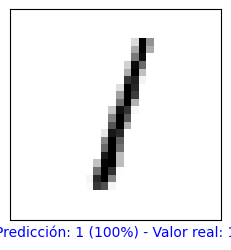

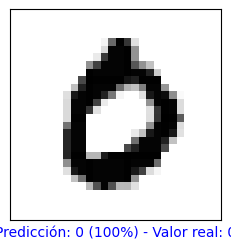

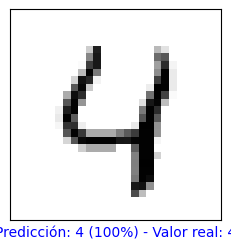

In [26]:
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    mostrar_prediccion(i, predictions[i], test_labels, test_data)
    plt.show()
